In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
df = pd.read_csv('./fake_news.csv')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.1, random_state = 42)

In [19]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [20]:
model = PassiveAggressiveClassifier(C = 0.5, random_state=42)

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       316
        REAL       0.94      0.93      0.94       318

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



Text(0.5, 1.0, 'Матрица ошибок')

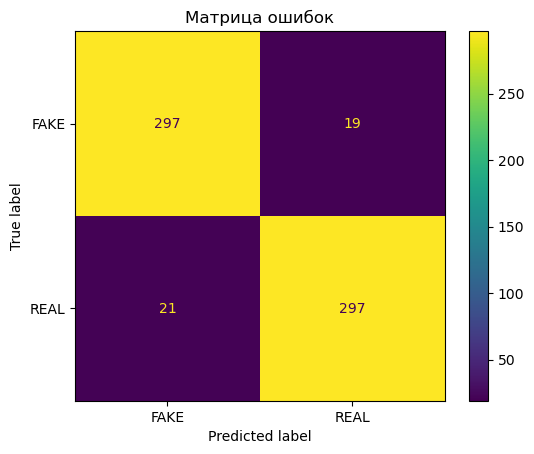

In [21]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, test_pred, ax=ax)
ax.set_title("Матрица ошибок")